In [1]:
#bank.csv dataset
#classification algorithm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [4]:
#How many rows and columns in given dataset
df.shape

(11162, 17)

In [5]:
#To check null values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

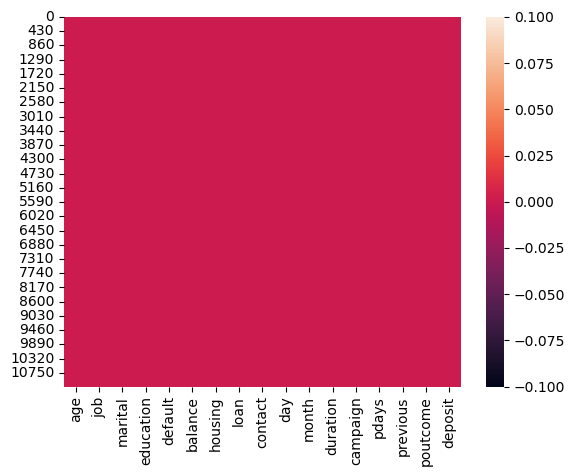

In [6]:
#Visualise Null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
#cross check , datatypes
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [9]:
#To check duplicates rows/records 
df.duplicated().sum()

0

In [10]:
#here target /output : deposit 
#how many samples of 1's and 0's 
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

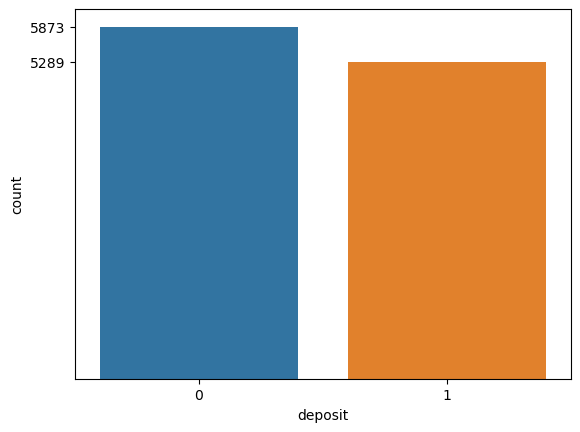

In [11]:
#visualise 
sns.countplot(data=df,x='deposit')
f=df['deposit'].value_counts()
plt.yticks(f)
plt.show()

In [12]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [13]:
df['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

In [14]:
df['marital'].value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

In [15]:
df['education'].value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
#Select input and output from given dataset
X=df.drop("deposit",axis=1) #select input
Y=df['deposit'] #output

In [18]:
X.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0    5      8      1042         1     -1         0         3  
1    5      8      1467         1     -1         0         3  
2    5      8      1389         1     -1         0         3  
3    5      8       579         1     -1         0         3  
4    5      8       673         2     -1         0         3

In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [20]:
#70% training and 30% testing 
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
X_train.shape,Y_train.shape

((7813, 16), (7813,))

In [22]:
X_test.shape,Y_test.shape

((3349, 16), (3349,))

In [23]:
#Apply Scaling 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
#create a user defined function
def create_model(model): #model user defined parameter which hold object of
    #class 
    model.fit(X_train,Y_train) #train the model with 70% data
    #Test the model with 30% data
    Y_pred=model.predict(X_test)
    #generate report 
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return model

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
#first use LogisticRegression algorithm 
#call class
from sklearn.linear_model import LogisticRegression 

In [27]:
#create object of LogisticRegression  class 
lr=LogisticRegression ()

In [28]:
#call function
lr=create_model(lr)

[[1441  319]
 [ 359 1230]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [29]:
#In LogisticRegression : Recall =73% which is good but not better
#limitation of LogisticRegression : this algorithm does not select imp
#features to predict the output 

In [30]:
#Apply DecisionTreeClassifier Algorithm in this given dataset 
#Call DecisionTreeClassifier class 
from sklearn.tree import DecisionTreeClassifier 

In [31]:
#create the object of class DecisionTreeClassifier 
dtc=DecisionTreeClassifier (random_state=1)

In [32]:
#call function
dtc=create_model(dtc)

[[1407  353]
 [ 372 1217]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [33]:
#check information gain of each input which hold the object of 
#DecisionTreeClassifier class 
#use inbuilt attributes feature_importances_ of DecisionTreeClassifier class
dtc.feature_importances_

array([0.07713619, 0.03421951, 0.01696765, 0.01435638, 0.00045636,
       0.0844372 , 0.04261978, 0.00693398, 0.06179287, 0.07658144,
       0.09835692, 0.35400803, 0.02231605, 0.04785625, 0.02585105,
       0.03611034])

In [34]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [35]:
dict={'IG':dtc.feature_importances_,'Input Columns':X.columns}
df1=pd.DataFrame(dict)
#sort dataframe according to IG descending order
df1=df1.sort_values("IG",ascending=False)
df1

IG Input Columns
11  0.354008      duration
10  0.098357         month
5   0.084437       balance
0   0.077136           age
9   0.076581           day
8   0.061793       contact
13  0.047856         pdays
6   0.042620       housing
15  0.036110      poutcome
1   0.034220           job
14  0.025851      previous
12  0.022316      campaign
2   0.016968       marital
3   0.014356     education
7   0.006934          loan
4   0.000456       default

In [36]:
#create a decisionTree 
from sklearn import tree
features=X.columns
print(features)
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dtc,feature_names=features,filled=True)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


<Figure size 2000x2000 with 0 Axes>

In [37]:
#But we got less score 0.76 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

In [38]:
#1. max_depth : inbulit parameter
#Note : max_depth can not be more than 8 in any dataset 
#create object of DecisionTreeClassifier class and passing the inbuilt
#parameter max_depth=
#apply hit and trial method
'''for i in range(1,9): #start i=1 stop=9-1=8 step=+1
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i) #i=1 then i=2 ....
    #dt1 user defined object of DecisionTreeClassifier class
    print("max depth : ",i)
    #call function
    dt1=create_model(dt1)
    '''
dt1=DecisionTreeClassifier(random_state=1,max_depth=5) 
#dt1 user defined object of DecisionTreeClassifier class
    
#call function
dt1=create_model(dt1)

[[1316  444]
 [ 228 1361]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [39]:
dict={'IG':dt1.feature_importances_,'Input Columns':X.columns}
df1=pd.DataFrame(dict)
#sort dataframe according to IG descending order
df1=df1.sort_values("IG",ascending=False)
df1

IG Input Columns
11  0.576413      duration
8   0.119728       contact
6   0.066337       housing
10  0.052438         month
15  0.051127      poutcome
13  0.050013         pdays
14  0.044950      previous
0   0.026846           age
7   0.003762          loan
9   0.003512           day
3   0.002853     education
5   0.001040       balance
12  0.000982      campaign
1   0.000000           job
2   0.000000       marital
4   0.000000       default

In [40]:
#create a decisionTree 
from sklearn import tree
features=X.columns
print(features)
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


<Figure size 2000x2000 with 0 Axes>

In [41]:
#in case of max_depth
#recall : 86% and accuracy : 80% 

In [42]:
#Apply 2nd pruning technique on same dataset
##2. min_samples_leaf  inbuilt parameter of DecisionTreeClassifier 
#min_samples_leaf can be greater or equal to 45  
#min_samples_leaf >=45 and min_samples_leaf <=100 
#leaf means no child 

In [43]:
#apply hit and trial method
'''for i in range(45,101): #start i=45 stop=101-1=100 step=+1
    dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) 
    #i=45 then i=46......i=100
    #dt1 user defined object of DecisionTreeClassifier class
    print("min_samples_leaf : ",i)
    #call function
    dt1=create_model(dt1)'''
    
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) 
#dt1 user defined object of DecisionTreeClassifier class
#call function
dt1=create_model(dt1)   

[[1379  381]
 [ 204 1385]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [44]:
dict={'IG':dt1.feature_importances_,'Input Columns':X.columns}
df1=pd.DataFrame(dict)
#sort dataframe according to IG descending order
df1=df1.sort_values("IG",ascending=False)
df1

IG Input Columns
11  0.496317      duration
10  0.109126         month
8   0.105357       contact
6   0.068329       housing
15  0.059375      poutcome
13  0.044066         pdays
0   0.043918           age
14  0.036294      previous
5   0.021749       balance
9   0.005046           day
1   0.004888           job
7   0.003143          loan
3   0.001979     education
12  0.000412      campaign
2   0.000000       marital
4   0.000000       default

In [45]:
#create a decisionTree 
from sklearn import tree
features=X.columns
print(features)
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


<Figure size 2000x2000 with 0 Axes>

In [46]:
'''
Logistic Regression   DecisionTreeClassifier DecisionTreeClassifier  DTC
Recall=               Recall =76%             with max_depth         min_samples
Accuracy              accuracy                recall =86%           recall=87%
                                              accuracy=80%          accuracy=83%
                                              
Best Algorithm in bank.csv : DecisionTreeClassifie rwith Pruning Technique 
min_samples_leaf=45 
'''

'\nLogistic Regression   DecisionTreeClassifier DecisionTreeClassifier  DTC\nRecall=               Recall =76%             with max_depth         min_samples\nAccuracy              accuracy                recall =86%           recall=87%\n                                              accuracy=80%          accuracy=83%\n                                              \nBest Algorithm in bank.csv : DecisionTreeClassifie rwith Pruning Technique \nmin_samples_leaf=45 \n'

In [47]:
#Ensembling Technique :
#RandomForestTree WORKING IN BAGGING : BOOTSTRAPING 

#INBUILT CLASS RandomForestClassifier --> define outer class ensemble -->
#define in inbuilt package sklearn

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
'''for i in range(10,101): #start =10 stop=101-1=100 step=+1
    #create the object of class RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    #n_estimators inbuilt parameters means no. of decisiontree
    #min decision tree=10 and max decisiontree=100
    print("No. of Decision tree : ",i)
    #call function 
    rfc=create_model(rfc)'''

#create the object of class RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=13,random_state=1)
#n_estimators inbuilt parameters means no. of decisiontree
#min decision tree=10 and max decisiontree=100
    
#call function 
rfc=create_model(rfc)

[[1428  332]
 [ 222 1367]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1760
           1       0.80      0.86      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.84      0.84      0.83      3349
weighted avg       0.84      0.83      0.83      3349



In [50]:
#recall=87% and accuracy=84%

In [51]:
dict={'IG':rfc.feature_importances_,'Input Columns':X.columns}
df1=pd.DataFrame(dict)
#sort dataframe according to IG descending order
df1=df1.sort_values("IG",ascending=False)
df1

IG Input Columns
11  0.368579      duration
5   0.090708       balance
0   0.088733           age
10  0.084152         month
9   0.070639           day
13  0.047102         pdays
15  0.040332      poutcome
8   0.038648       contact
1   0.038006           job
12  0.032280      campaign
6   0.031611       housing
3   0.020879     education
2   0.019882       marital
14  0.016546      previous
7   0.010426          loan
4   0.001478       default

In [52]:
X_train.shape

(7813, 16)

In [53]:
#Boosting Technique : -
#1. ADA Boost :  Adaptor Boosting
#inbuilt class AdaBoostClassifier  : it is used for Ensembling technique 
#ADABoost : works on decision Stump (Gini index or Entropy)
#call class
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#Create object of class AdaBoostClassifier 
ada=AdaBoostClassifier(n_estimators=3,random_state=1)
#call function
ada=create_model(ada)
                       

[[1262  498]
 [ 310 1279]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



In [55]:
dict={'IG':ada.feature_importances_,'Input Columns':X.columns}
df1=pd.DataFrame(dict)
#sort dataframe according to IG descending order
df1=df1.sort_values("IG",ascending=False)
df1

IG Input Columns
11  0.666667      duration
8   0.333333       contact
0   0.000000           age
1   0.000000           job
2   0.000000       marital
3   0.000000     education
4   0.000000       default
5   0.000000       balance
6   0.000000       housing
7   0.000000          loan
9   0.000000           day
10  0.000000         month
12  0.000000      campaign
13  0.000000         pdays
14  0.000000      previous
15  0.000000      poutcome

In [56]:
#Hit and trian method of this dataset 
#here no.of inputs =16
'''for i in range(1,17): #start i=1 stop=17-1=16 step=+1
    #Create object of class AdaBoostClassifier 
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of estimators : ",i)
    #(n_estimators means how many decision stump , decision stump depend on no. of inputs
    #train and test the model , call function
    ada=create_model(ada)'''

'for i in range(1,17): #start i=1 stop=17-1=16 step=+1\n    #Create object of class AdaBoostClassifier \n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No. of estimators : ",i)\n    #(n_estimators means how many decision stump , decision stump depend on no. of inputs\n    #train and test the model , call function\n    ada=create_model(ada)'

In [57]:
#Support Vector Machine on bank dataset
#apply Linear support vector use 1. kernel function LinearSVC 
from sklearn.svm import LinearSVC

In [59]:
#create object of class LinearSVC class
svc=LinearSVC(random_state=1)

In [60]:
#call function
svc=create_model(svc)

[[1444  316]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [61]:
#Here Recall is good but not better , so give the given datase in polynomial kernel function
#means we will assume , data is non -linear . 
#polynomial kernel function , use inbuilt class SVC -->define in outer class svm
#SVC means support vector classifier , it is used for non-linear data
from sklearn.svm import SVC


In [62]:
#create object of SVC class and passing the value 'poly' in parameter kernel
poly_svc=SVC(random_state=1,kernel="poly")

In [63]:
#perform model
#call function
poly_svc=create_model(poly_svc)

[[1417  343]
 [ 311 1278]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [64]:
#Apply radial basis kernel function
#create object of SVC class and passing the value 'rbf' in parameter kernel
radial_svc=SVC(random_state=1,kernel="rbf")

In [65]:
#perform model
#call function
radial_svc=create_model(radial_svc)

[[1407  353]
 [ 262 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

